# Assignment#2 Image Segmentation

## Problem Statement
We intend to perform image segmentation. Image segmentation means that we can group
similar pixels together and give these grouped pixels the same label. The grouping
problem is a clustering problem. We want to study the use of K-means on the Berkeley
Segmentation Benchmark. Below we will show the needed steps to achieve the goal of
the assignment.

In [108]:
#Reset Variables if memory goes crucial.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [109]:
#imports cell 
from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

## Step 1 : Download the dataset and understand the format

In [110]:
#Utility Method to loadImages into list and their corresponding ground truth from a given path parameter.
def LoadImagesWithGroundTruth(imgs_path, groundTruth_path):
    # return array of images
    loadedImages = []
    loadedMatFiles = []
    imagesList = listdir(imgs_path)
    for image in imagesList:
        mat = scipy.io.loadmat(groundTruth_path+image[:-4])
        img = PImage.open(imgs_path + image)
        loadedImages.append(img)
        loadedMatFiles.append(mat)
    return loadedImages,loadedMatFiles

In [112]:
train_path = "./data/images/train/"
test_path = "./data/images/test/"
val_path = "./data/images/val/"
gt_train_path = "./data/groundTruth/train/"
gt_test_path = "./data/groundTruth/test/"
gt_val_path = "./data/groundTruth/val/"
# store images in lists.
train_imgs, train_gt = LoadImagesWithGroundTruth(train_path,gt_train_path)
test_imgs, test_gt = LoadImagesWithGroundTruth(test_path,gt_test_path)
val_imgs, val_gt = LoadImagesWithGroundTruth(val_path,gt_val_path)
print("Length of Trainset = ",len(train_imgs),"\nLength of Testset = ",len(test_imgs),"\nLength of Validationset = ",len(val_imgs))

Length of Trainset =  200 
Length of Testset =  200 
Length of Validationset =  100


## Step 2: Visualize the image and the ground truth segmentation

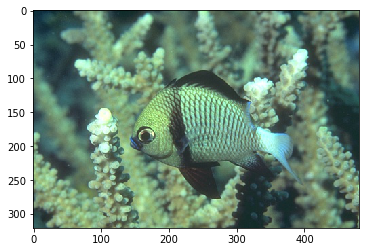

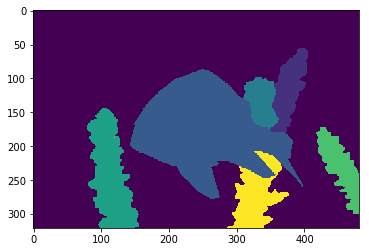

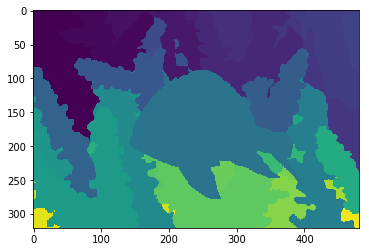

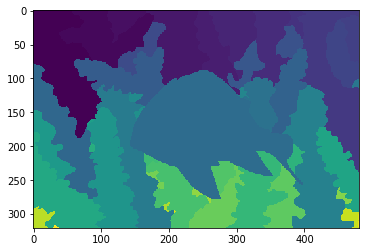

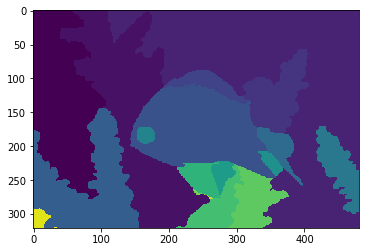

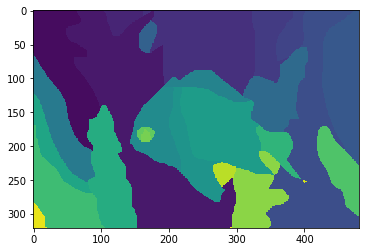

In [135]:
plt.imshow(train_imgs[10]);
plt.figure();
plt.imshow(train_gt[10]['groundTruth'][0,0][0][0][0]);
plt.figure();
plt.imshow(train_gt[10]['groundTruth'][0,1][0][0][0]);
plt.figure();
plt.imshow(train_gt[10]['groundTruth'][0,2][0][0][0]);
plt.figure();
plt.imshow(train_gt[10]['groundTruth'][0,3][0][0][0]);
plt.figure();
plt.imshow(train_gt[10]['groundTruth'][0,4][0][0][0]);

## Step 3: Segmentation using K-means